# COVID-19 Data Analysis Project

### Objective:

The primary objective of this project is to derive actionable insights from the publicly available COVID-19 data that can inform health-related decision-making in Australia and support evidence-based interventions and policies.



## 1. Data Importation and Preliminary Exploration
### 1.1 Importing Libraries and Datasets


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  
import missingno
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Define file paths
file_paths = {
    "stay_at_home": "data/stay-at-home-covid.csv",
    "school_closures": "data/school-closures-covid.csv",
    "public_events": "data/public-events-covid.csv",
    "owid_old": "data/owid-covid-data-old.csv",
    "owid": "data/owid-covid-data.csv",
    "variants": "data/covid-variants-bar.csv"
}
# Import datasets separately
stay_at_home = pd.read_csv(file_paths["stay_at_home"])
school_closures = pd.read_csv(file_paths["school_closures"])
public_events = pd.read_csv(file_paths["public_events"])
owid_old = pd.read_csv(file_paths["owid_old"])
owid = pd.read_csv(file_paths["owid"])
variants = pd.read_csv(file_paths["variants"])

# Store datasets in a dictionary for easy access
datasets = {
    "stay_at_home": stay_at_home,
    "school_closures": school_closures,
    "public_events": public_events,
    "owid_old": owid_old,
    "owid": owid,
    "variants": variants
}

# Display the head of each dataset using a loop
pd.set_option('display.max_columns', None)
for name, data in datasets.items():
    print(f"First few rows of the {name.replace('_', ' ').title()} Dataset:\n")
    display(data.head())
    print("\n" + "-"*100 + "\n")

First few rows of the Stay At Home Dataset:



,Entity,Code,Day,stay_home_requirements
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0



----------------------------------------------------------------------------------------------------

First few rows of the School Closures Dataset:



,Entity,Code,Day,school_closures
0,Afghanistan,AFG,2020-01-21,0
1,Afghanistan,AFG,2020-01-22,0
2,Afghanistan,AFG,2020-01-23,0
3,Afghanistan,AFG,2020-01-24,0
4,Afghanistan,AFG,2020-01-25,0



----------------------------------------------------------------------------------------------------

First few rows of the Public Events Dataset:



,Entity,Code,Day,cancel_public_events
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0



----------------------------------------------------------------------------------------------------

First few rows of the Owid Old Dataset:



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN



----------------------------------------------------------------------------------------------------

First few rows of the Owid Dataset:



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN



----------------------------------------------------------------------------------------------------

First few rows of the Variants Dataset:



,Entity,Code,Day,Alpha,Beta,Gamma,Delta,Omicron (BA.1),Omicron (BA.2),Omicron (BA.2.12.1),Omicron (BA.2.75),Omicron (BA.4),Omicron (BA.5),Omicron (BQ.1),Omicron (XBB),Omicron (XBB.1.5),Omicron (XBB.1.16),Omicron (CH.1.1),Omicron (XBB.1.9),Omicron (XBB.2.3),Omicron (EG.5.1),Recombinant,non_who
0,Albania,ALB,2021-12-06,0,0,0,228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,ALB,2021-12-20,0,0,0,311,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Albania,ALB,2022-01-31,0,0,0,11,175,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Albania,ALB,2022-02-14,0,0,0,8,223,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Albania,ALB,2022-02-28,0,0,0,1,85,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0



----------------------------------------------------------------------------------------------------



In [13]:
# information and summary of datasets
for name, df in datasets.items():
    
    # Info of the dataset
    print(f"Info of the {name.replace('_', ' ').title()} Dataset:\n")
    df.info()
    print("\n" + "-"*100 + "\n")
    
    # Summary of the dataset
    print(f"Summary of the {name.replace('_', ' ').title()} Dataset:\n")
    display(df.describe())
    print("\n" + "-"*100 + "\n")

Info of the Stay At Home Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Entity                  202760 non-null  object
 1   Code                    202760 non-null  object
 2   Day                     202760 non-null  object
 3   stay_home_requirements  202760 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ MB

----------------------------------------------------------------------------------------------------

Summary of the Stay At Home Dataset:



,stay_home_requirements
count,202760.000000
mean,0.742050
std,0.915834
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,3.000000



----------------------------------------------------------------------------------------------------

Info of the School Closures Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199060 entries, 0 to 199059
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Entity           199060 non-null  object
 1   Code             199060 non-null  object
 2   Day              199060 non-null  object
 3   school_closures  199060 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ MB

----------------------------------------------------------------------------------------------------

Summary of the School Closures Dataset:



,school_closures
count,199060.000000
mean,1.215362
std,1.137866
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000



----------------------------------------------------------------------------------------------------

Info of the Public Events Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Entity                202760 non-null  object
 1   Code                  202760 non-null  object
 2   Day                   202760 non-null  object
 3   cancel_public_events  202760 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ MB

----------------------------------------------------------------------------------------------------

Summary of the Public Events Dataset:



,cancel_public_events
count,202760.000000
mean,1.103240
std,0.851885
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000



----------------------------------------------------------------------------------------------------

Info of the Owid Old Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262423 entries, 0 to 262422
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    262423 non-null  object 
 1   continent                                   247696 non-null  object 
 2   location                                    262423 non-null  object 
 3   date                                        262423 non-null  object 
 4   total_cases                                 247875 non-null  float64
 5   new_cases                                   247524 non-null  float64
 6   new_cases_smoothed                          246320 non-null  float64
 7   total_deaths                                228138 non-null  float64
 8   new_deaths

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.478750e+05,2.475240e+05,2.463200e+05,2.281380e+05,228025.000000,226839.000000,246750.000000,246399.000000,245200.000000,227026.000000,226913.000000,225732.000000,184817.000000,33347.000000,33347.000000,36191.000000,36191.000000,8776.000000,8776.000000,20704.000000,20704.000000,7.938700e+04,7.540300e+04,79387.000000,75403.000000,1.039650e+05,103965.000000,95927.000000,9.434800e+04,7.259500e+04,6.949400e+04,6.716500e+04,4.132500e+04,6.000500e+04,1.578700e+05,72595.000000,69494.000000,67165.000000,41325.000000,157870.000000,1.577910e+05,157791.000000,185194.000000,228794.000000,211512.000000,209283.000000,210406.000000,211315.000000,137566.000000,210875.000000,222020.000000,160019.000000,157830.000000,104065.000000,188104.000000,240919.000000,206226.000000,2.612980e+05,8.807000e+03,8807.000000,8807.000000,8807.000000
mean,5.404885e+06,1.164612e+04,1.169534e+04,8.065772e+04,125.340498,125.919783,75398.191601,175.568664,176.166249,761.558272,1.253541,1.253066,0.911495,730.272738,17.572611,3876.128513,144.460959,384.830333,11.697715,4373.997150,89.984749,2.110457e+07,6.728541e+04,924.254762,3.272466,1.421784e+05,2.826309,0.098163,2.403633e+03,3.453840e+08,1.547988e+08,1.365743e+08,8.136398e+07,8.617808e+05,3.441926e+05,111.771574,50.066076,45.163304,30.943331,2220.060271,1.273508e+05,0.090243,44.938107,455.478832,30.578885,8.779113,5.538277,19490.882371,13.661857,261.833268,8.395738,10.690059,32.822227,50.887474,3.088937,73.594849,0.724507,1.405100e+08,5.315074e+04,10.310701,13.967308,1524.602805
std,3.314678e+07,8.145950e+04,7.918795e+04,4.104449e+05,731.502725,678.060348,126332.090252,1119.043553,662.589569,1036.074578,4.886632,3.148839,0.399925,2296.502943,23.847691,10210.628088,166.359063,552.779872,14.379849,11557.905593,91.397926,8.409869e+07,2.477340e+05,2195.428504,9.033843,1.138215e+06,7.308233,0.115978,3.344366e+04,1.341216e+09,6.006142e+08,5.428128e+08,2.971336e+08,3.444581e+06,2.130113e+06,82.969548,30.006896,29.582087,28.633752,3331.840372,8.666267e+05,0.191013,23.682815,2101.409119,9.062504,6.120160,4.158560,20514.771499,20.039709,120.377022,4.752236,10.645834,13.539768,31.881500,2.551233,7.446652,0.149551,6.915875e+08,1.444128e+05,13.129721,25.736074,1856.357022
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


----------------------------------------------------------------------------------------------------

Info of the Owid Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346619 entries, 0 to 346618
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    346619 non-null  object 
 1   continent                                   330122 non-null  object 
 2   location                                    346619 non-null  object 
 3   date                                        346619 non-null  object 
 4   total_cases                                 308672 non-null  float64
 5   new_cases                                   337028 non-null  float64
 6   new_cases_smoothed                          335769 non-null  float64
 7   total_deaths                                287169 non-null  float64
 8   new_deaths    

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.086720e+05,3.370280e+05,3.357690e+05,2.871690e+05,337072.000000,335842.000000,308672.000000,337028.000000,335769.000000,287169.000000,337072.000000,335842.000000,184817.000000,37515.000000,37515.000000,38769.000000,38769.000000,10163.000000,10163.000000,23155.000000,23155.000000,7.938700e+04,7.540300e+04,79387.000000,75403.000000,1.039650e+05,103965.000000,95927.000000,9.434800e+04,7.899900e+04,7.561900e+04,7.227000e+04,4.727700e+04,6.505800e+04,1.801490e+05,78999.000000,75619.000000,72270.000000,47277.000000,180149.000000,1.799550e+05,179955.000000,197651.000000,294202.000000,273615.000000,264040.000000,270873.000000,268153.000000,172802.000000,268763.000000,282439.000000,201607.000000,198865.000000,131633.000000,237253.000000,318858.000000,260498.000000,3.466190e+05,1.204800e+04,12048.000000,12048.000000,12048.000000
mean,6.609069e+06,9.695906e+03,9.732069e+03,8.559525e+04,86.392889,86.704207,100634.394008,146.569024,147.113196,867.354640,0.917433,0.920564,0.911495,678.009196,16.285897,3945.052955,130.345048,340.760504,10.321609,4334.873548,86.025259,2.110457e+07,6.728541e+04,924.254762,3.272466,1.421784e+05,2.826309,0.098163,2.403633e+03,4.397842e+08,1.953520e+08,1.779129e+08,1.129642e+08,8.041015e+05,3.059256e+05,118.241653,51.925768,46.977461,34.233718,1988.126945,1.131956e+05,0.080161,42.714021,404.176048,30.507512,8.700150,5.499777,18982.904534,13.845461,264.271815,8.560849,10.792102,32.909864,50.789487,3.097213,73.714644,0.722475,1.284433e+08,5.156661e+04,9.839675,11.240876,1663.875712
std,4.032547e+07,1.108324e+05,9.495414e+04,4.380493e+05,616.815791,561.926045,150292.226515,1169.506821,602.840371,1096.750172,5.158339,2.789066,0.399925,2178.262237,23.076586,10005.595203,153.296859,528.205303,13.869182,11091.412326,89.427913,8.409869e+07,2.477340e+05,2195.428504,9.033843,1.138215e+06,7.308233,0.115978,3.344366e+04,1.576854e+09,6.927026e+08,6.370606e+08,3.667840e+08,3.316336e+06,1.998070e+06,84.837017,29.794488,29.446357,30.232393,3204.992903,8.126445e+05,0.181221,24.911007,1841.305148,9.082996,6.094444,4.135949,19938.633328,20.089576,120.923435,4.941275,10.780079,13.573690,31.955726,2.548324,7.395401,0.148980,6.607136e+08,1.441432e+05,12.424420,25.474620,1937.051106
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0


----------------------------------------------------------------------------------------------------

Info of the Variants Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Entity               3562 non-null   object
 1   Code                 3562 non-null   object
 2   Day                  3562 non-null   object
 3   Alpha                3562 non-null   int64 
 4   Beta                 3562 non-null   int64 
 5   Gamma                3562 non-null   int64 
 6   Delta                3562 non-null   int64 
 7   Omicron (BA.1)       3562 non-null   int64 
 8   Omicron (BA.2)       3562 non-null   int64 
 9   Omicron (BA.2.12.1)  3562 non-null   int64 
 10  Omicron (BA.2.75)    3562 non-null   int64 
 11  Omicron (BA.4)       3562 non-null   int64 
 12  Omicron (BA.5)       3562 non-null   int64 
 13  Omicron (BQ.1)     

,Alpha,Beta,Gamma,Delta,Omicron (BA.1),Omicron (BA.2),Omicron (BA.2.12.1),Omicron (BA.2.75),Omicron (BA.4),Omicron (BA.5),Omicron (BQ.1),Omicron (XBB),Omicron (XBB.1.5),Omicron (XBB.1.16),Omicron (CH.1.1),Omicron (XBB.1.9),Omicron (XBB.2.3),Omicron (EG.5.1),Recombinant,non_who
count,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000
mean,272.743122,7.853734,33.575800,1187.057271,654.385738,519.336047,78.903144,30.791129,52.078046,495.185289,123.223751,14.875912,94.481752,19.571028,16.006738,28.758563,7.741999,11.866086,12.703257,79.335486
std,2007.343623,46.932626,308.600242,8548.882799,7499.278936,4097.439185,1532.399448,158.952649,452.716633,2860.709963,1005.186592,91.872791,799.211719,137.661598,103.479385,130.795991,51.099981,108.078600,54.145828,1010.060083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,124.000000,2.000000,30.000000,0.000000,2.000000,2.000000,69.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
max,45288.000000,643.000000,5567.000000,144139.000000,207976.000000,135577.000000,51637.000000,2102.000000,12017.000000,63621.000000,28952.000000,2477.000000,20690.000000,3328.000000,2620.000000,1829.000000,1306.000000,3224.000000,976.000000,29471.000000



----------------------------------------------------------------------------------------------------



* `stay_at_home`: Dictates the stay-at-home requirements per country, per day.
* `school_closures`: Provides information on school closure status per country, per day.
* `public_events`: Reflects the public event restrictions per country, per day.
* `owid_old & owid`: Detailed datasets covering various COVID-19 statistics per country, per day.
* `variants`: Shows the total daily cases of each variant.


## 3. Data Cleaning and Preprocessing

In [15]:
for dataset in [stay_at_home, school_closures, public_events, owid, variants]:
    print(dataset.isnull().sum())

Entity                    0
Code                      0
Day                       0
stay_home_requirements    0
dtype: int64
Entity             0
Code               0
Day                0
school_closures    0
dtype: int64
Entity                  0
Code                    0
Day                     0
cancel_public_events    0
dtype: int64
iso_code                                        0
continent                                   16497
location                                        0
date                                            0
total_cases                                 37947
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       334571
excess_mortality_cumulative                334571
excess_mortality                           334571
excess_mortality_cumulative_per_million    334571
Length: 67, dtype: int64
Entity                 0
Code                   0
Day                    0
Alpha      

In [16]:
# Convert and standardize date columns
date_column_renames = {
    "stay_at_home": "Day",
    "school_closures": "Day",
    "public_events": "Day",
    "owid_old": "date",
    "owid": "date",
    "variants": "Day"  
}

datasets = [stay_at_home, school_closures, public_events, owid_old, owid, variants]

for df, df_name in zip(datasets, file_paths):
    date_column = date_column_renames[df_name]
    df[date_column] = pd.to_datetime(df[date_column], format='%Y-%m-%d')
    if date_column != "date":
        df.rename(columns={date_column: 'date'}, inplace=True)

# Display the head of 'date' columns for each dataset
for df, df_name in zip(datasets, file_paths):
    print(f"\nFirst five 'date' entries for {df_name}:")
    print(df['date'].head())


First five 'date' entries for stay_at_home:
0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-04
4   2020-01-05
Name: date, dtype: datetime64[ns]

First five 'date' entries for school_closures:
0   2020-01-21
1   2020-01-22
2   2020-01-23
3   2020-01-24
4   2020-01-25
Name: date, dtype: datetime64[ns]

First five 'date' entries for public_events:
0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-04
4   2020-01-05
Name: date, dtype: datetime64[ns]

First five 'date' entries for owid_old:
0   2020-02-24
1   2020-02-25
2   2020-02-26
3   2020-02-27
4   2020-02-28
Name: date, dtype: datetime64[ns]

First five 'date' entries for owid:
0   2020-01-03
1   2020-01-04
2   2020-01-05
3   2020-01-06
4   2020-01-07
Name: date, dtype: datetime64[ns]

First five 'date' entries for variants:
0   2021-12-06
1   2021-12-20
2   2022-01-31
3   2022-02-14
4   2022-02-28
Name: date, dtype: datetime64[ns]


## 4. Exploratory Data Analysis (EDA) on the OWID Dataset¶

Understanding the data distributions, patterns, and potential outliers through visualization and statistical summaries.

### 4.1 Descriptive Statistics

In [17]:
# Basic Descriptive Statistics
print(owid.describe())

# Check for Missing Values
print(owid.isnull().sum())

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  3.086720e+05  3.370280e+05        3.357690e+05  2.871690e+05   
mean   6.609069e+06  9.695906e+03        9.732069e+03  8.559525e+04   
std    4.032547e+07  1.108324e+05        9.495414e+04  4.380493e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    7.988750e+03  0.000000e+00        2.860000e-01  1.250000e+02   
50%    6.904700e+04  2.000000e+00        2.585700e+01  1.313000e+03   
75%    7.345502e+05  2.730000e+02        5.107140e+02  1.181800e+04   
max    7.711505e+08  8.401961e+06        6.402036e+06  6.960770e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  337072.000000        335842.000000            308672.000000   
mean       86.392889            86.704207            100634.394008   
std       616.815791           561.926045            150292.226515   
min         0.000000             0.000000                 0.000000   
25%       

### 4.2 Visual Exploration of Key Variables

In [18]:
# Excluding "World", and locations which contain "income" or continent names
excluded_terms = ['World', 'income', 'Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
excluded_indices = owid['location'].isin(excluded_terms) | owid['location'].str.contains('income')

# Ensure you're not working with the excluded data
filtered_owid = owid[~excluded_indices]

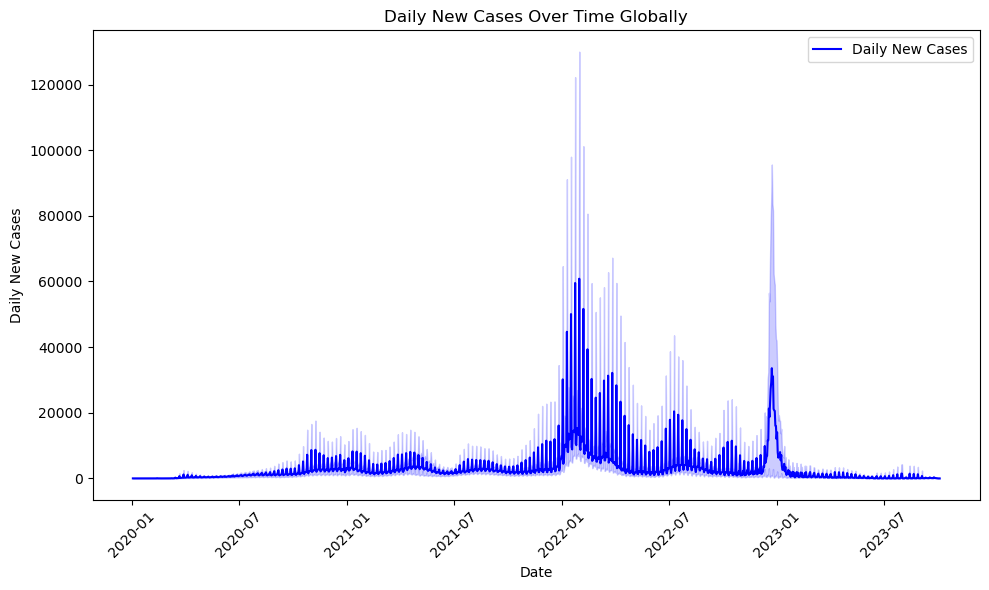

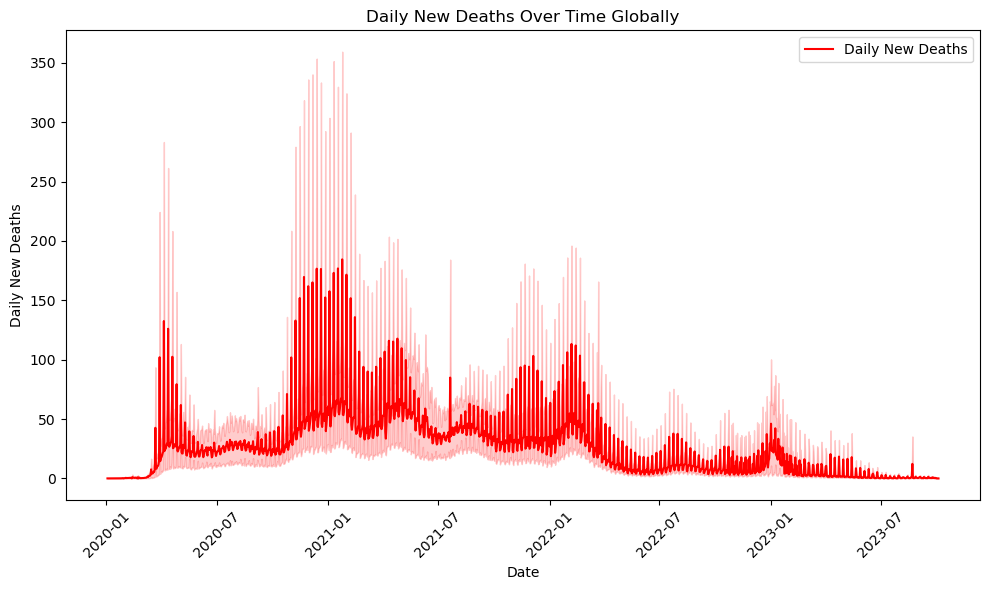

In [19]:
# Daily New Cases Globally
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='new_cases', color='blue', label='Daily New Cases')
plt.title('Daily New Cases Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Daily New Deaths Globally
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='new_deaths', color='red', label='Daily New Deaths')
plt.title('Daily New Deaths Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Daily New Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

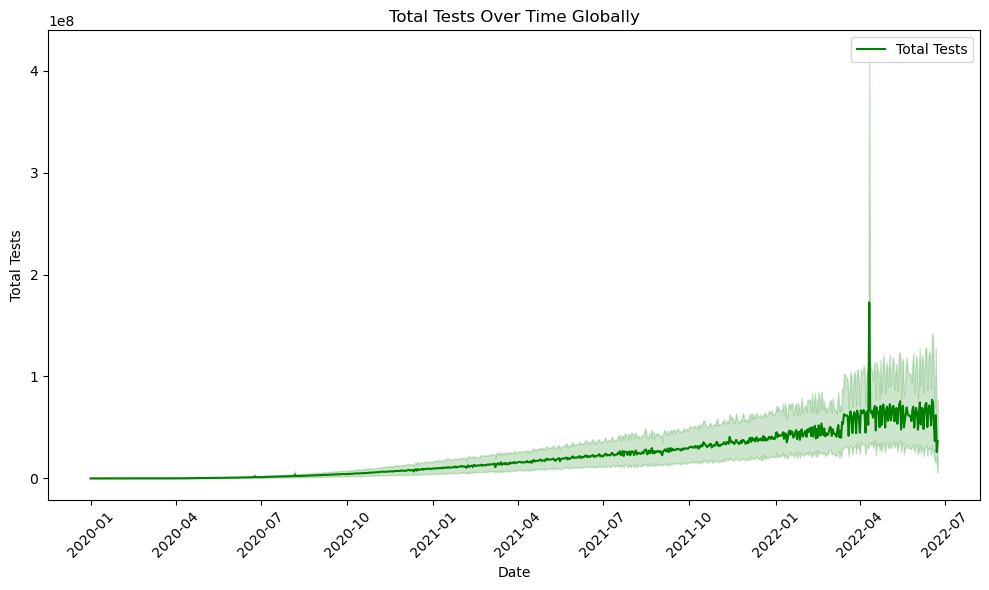

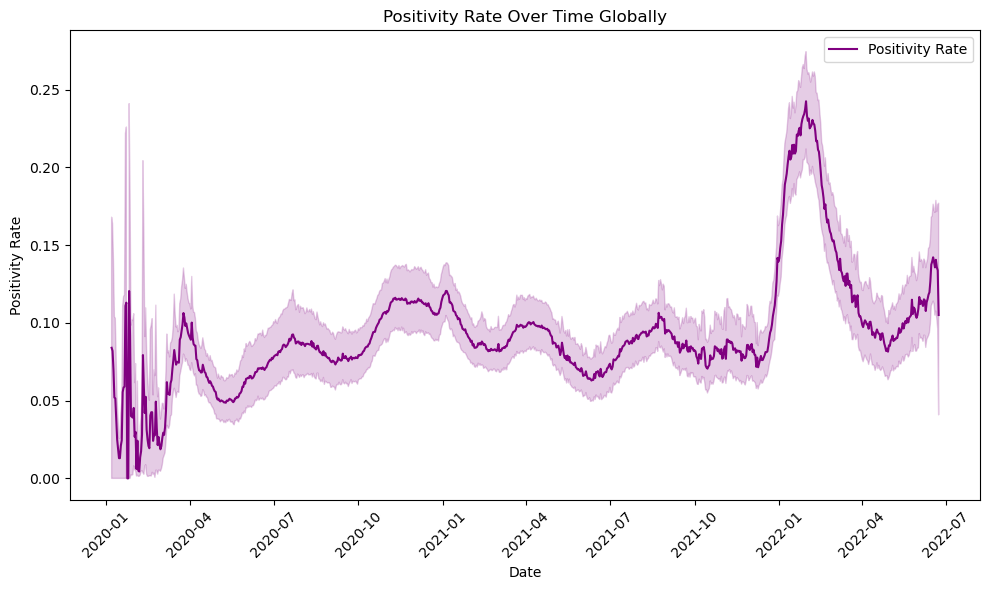

In [20]:
# Total Tests Globally
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='total_tests', color='green', label='Total Tests')
plt.title('Total Tests Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Total Tests')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Positivity Rate Globally
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='positive_rate', color='purple', label='Positivity Rate')
plt.title('Positivity Rate Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Positivity Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

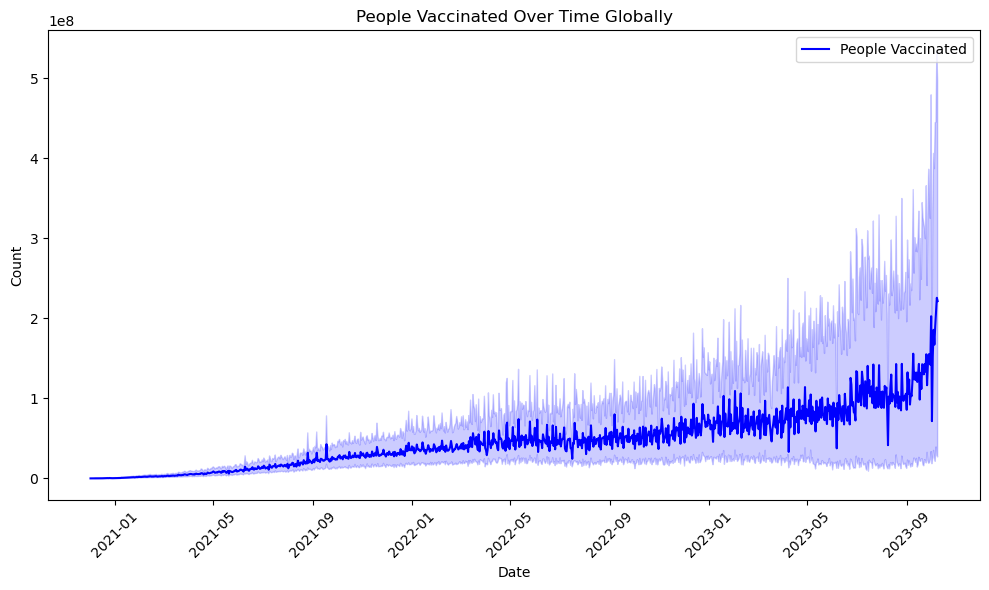

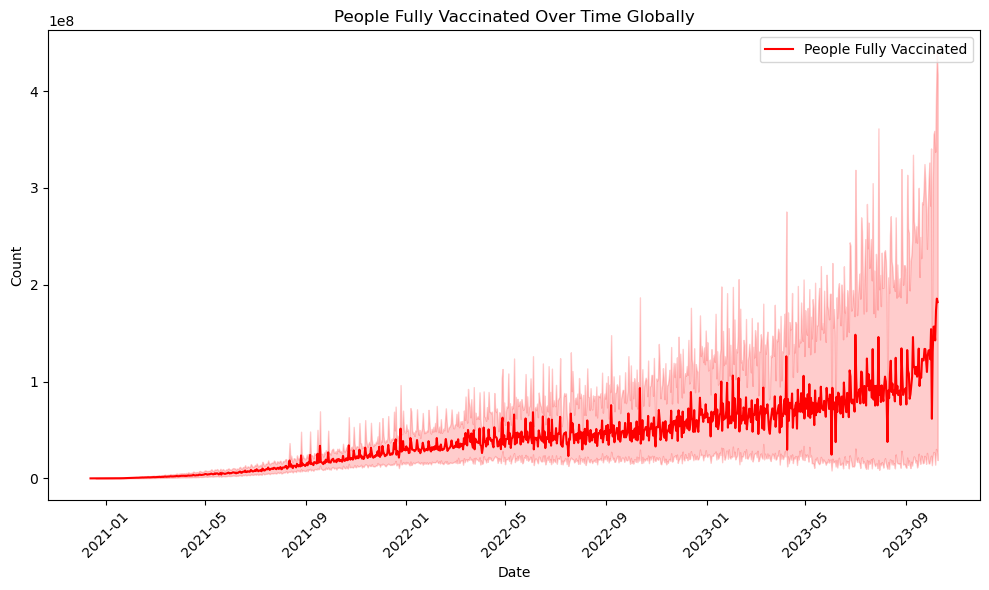

In [21]:
# Plot for People Vaccinated Globally
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='people_vaccinated', color='blue', label='People Vaccinated')
plt.title('People Vaccinated Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for People Fully Vaccinated Globally
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='people_fully_vaccinated', color='red', label='People Fully Vaccinated')
plt.title('People Fully Vaccinated Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

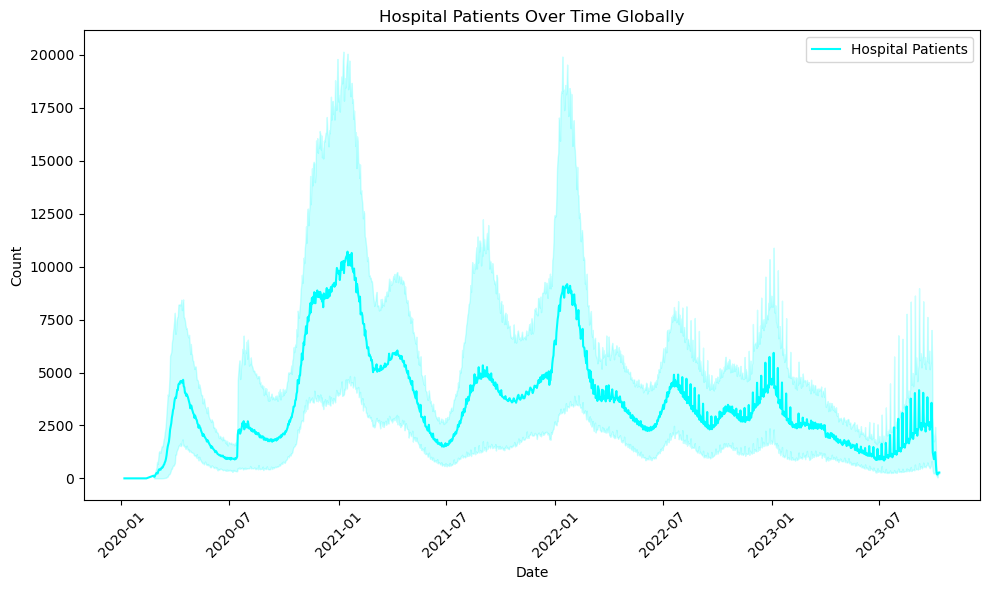

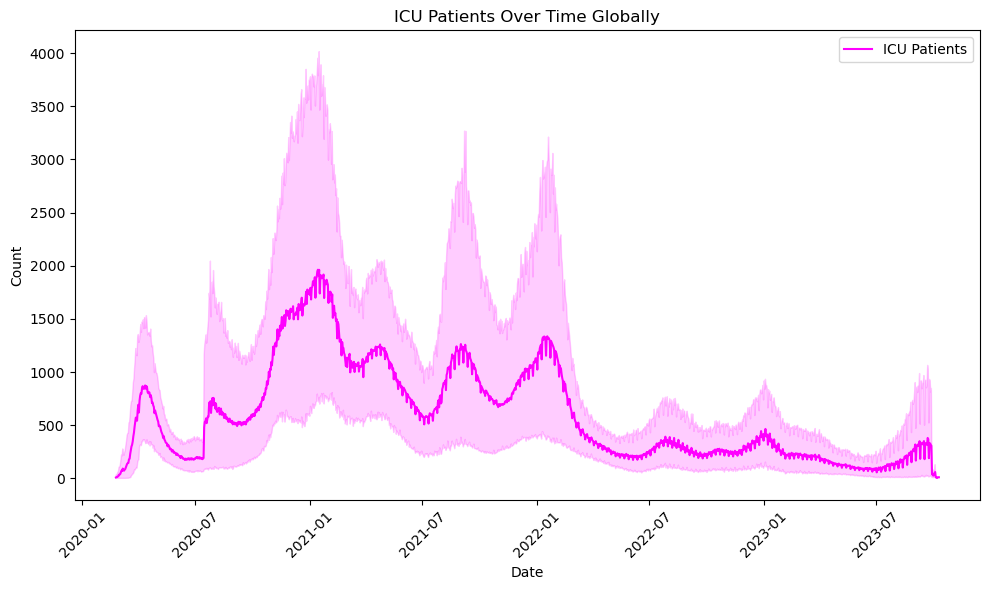

In [22]:
#  Visualization of Hospital and ICU Patients Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='hosp_patients', label='Hospital Patients', color='cyan')
plt.title('Hospital Patients Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='icu_patients', label='ICU Patients', color='magenta')
plt.title('ICU Patients Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


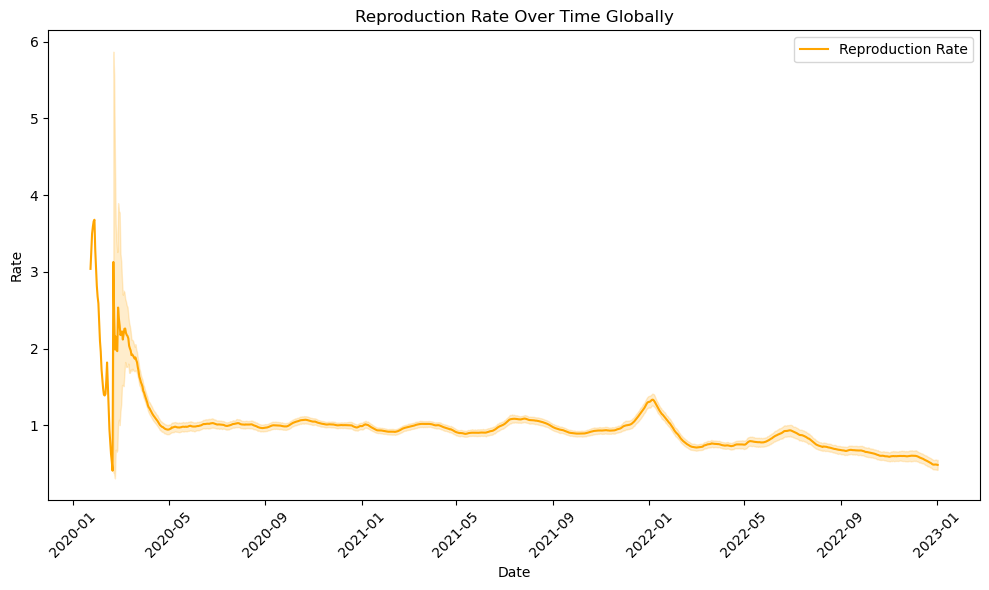

In [23]:
# Visualization of Total Tests vs Positive Rate
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='reproduction_rate', label='Reproduction Rate', color='orange')
plt.title('Reproduction Rate Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


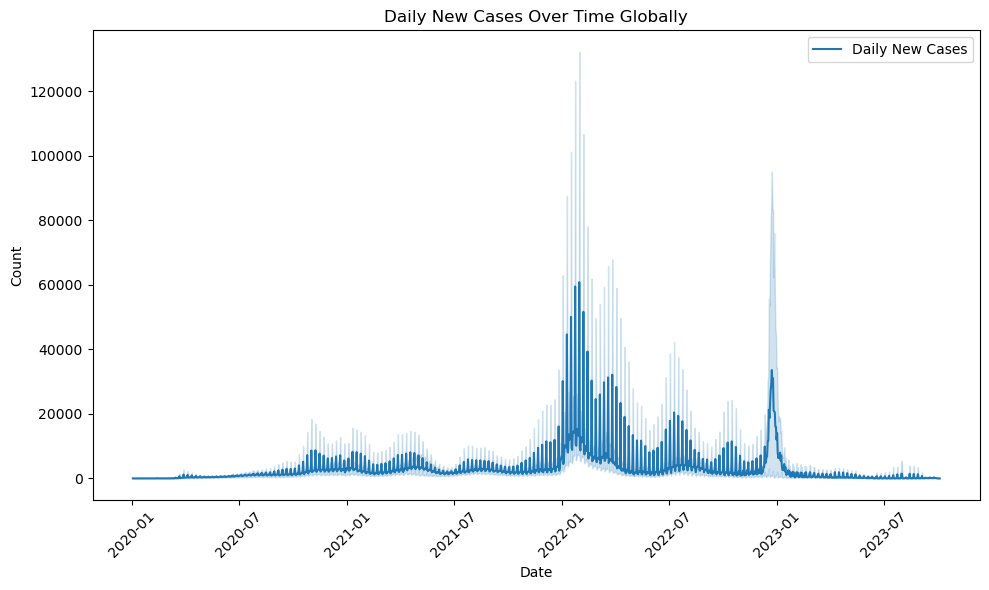

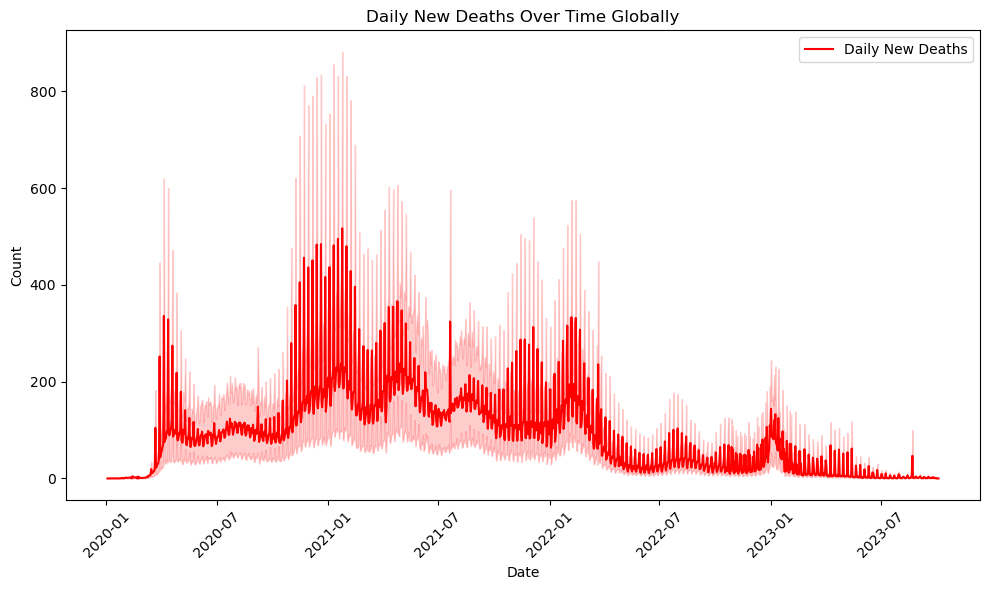

In [24]:
# Visualization of New Cases vs New Deaths
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_owid, x='date', y='new_cases', label='Daily New Cases')
plt.title('Daily New Cases Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=owid, x='date', y='new_deaths', label='Daily New Deaths', color='red')
plt.title('Daily New Deaths Over Time Globally')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

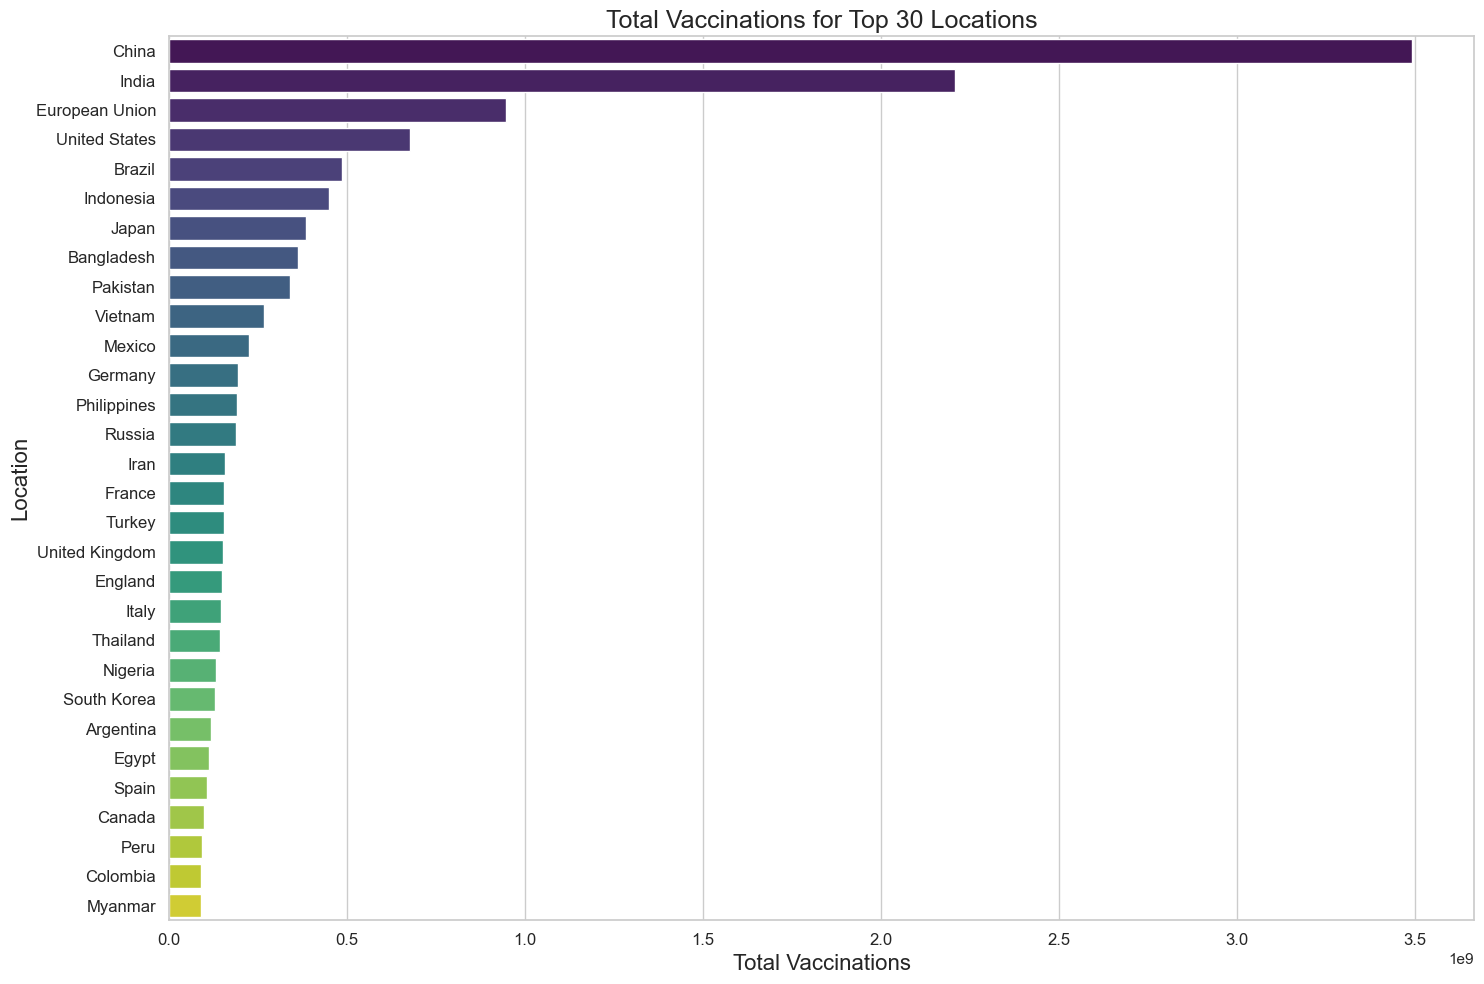

In [25]:
# Improve figure quality by increasing figure size, label font sizes, etc.
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10), dpi=100)  # 'dpi' increases the resolution of the plot
top_vaccinations = filtered_owid.groupby('location')['total_vaccinations'].max().sort_values(ascending=False).head(30)

# Improved color palette, using one of seaborn's predefined palettes. 
# This gives a more aesthetic appeal to the plot, especially when there are many bars.
palette = sns.color_palette("viridis", n_colors=top_vaccinations.shape[0])

sns.barplot(y=top_vaccinations.index, x=top_vaccinations.values, palette=palette)
plt.title('Total Vaccinations for Top 30 Locations', fontsize=18)  # Increase font size for title
plt.ylabel('Location', fontsize=16)  # Increase font size for y-label
plt.xlabel('Total Vaccinations', fontsize=16)  # Increase font size for x-label

# Increase font size and manipulate the labels to prevent them from overlapping
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the figure in high resolution
plt.savefig("high_res_vaccination_plot.png", dpi=300)

plt.show()

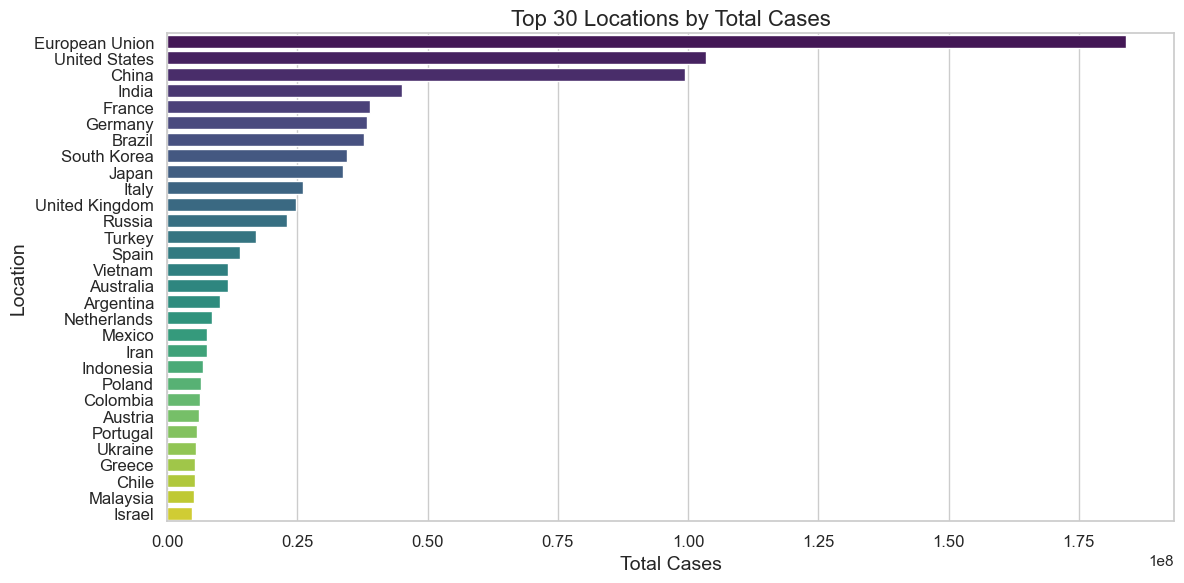

In [26]:
#total cases
# Data Preparation
top_cases = filtered_owid.groupby('location')['total_cases'].max().sort_values(ascending=False).head(30)

# Plotting
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(y=top_cases.index, x=top_cases.values, palette="viridis")
plt.title('Top 30 Locations by Total Cases', fontsize=16)
plt.xlabel('Total Cases', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("total_cases_barplot.png", dpi=300)
plt.show()


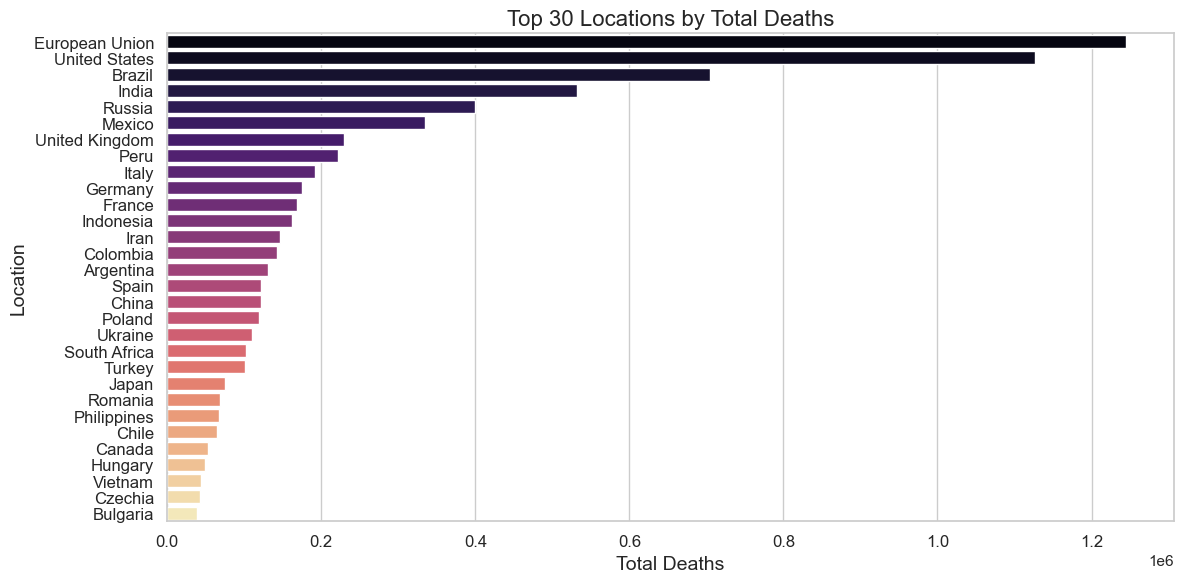

In [27]:
# Data Preparation
top_deaths = filtered_owid.groupby('location')['total_deaths'].max().sort_values(ascending=False).head(30)

# Plotting
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(y=top_deaths.index, x=top_deaths.values, palette="magma")
plt.title('Top 30 Locations by Total Deaths', fontsize=16)
plt.xlabel('Total Deaths', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("total_deaths_barplot.png", dpi=300)
plt.show()


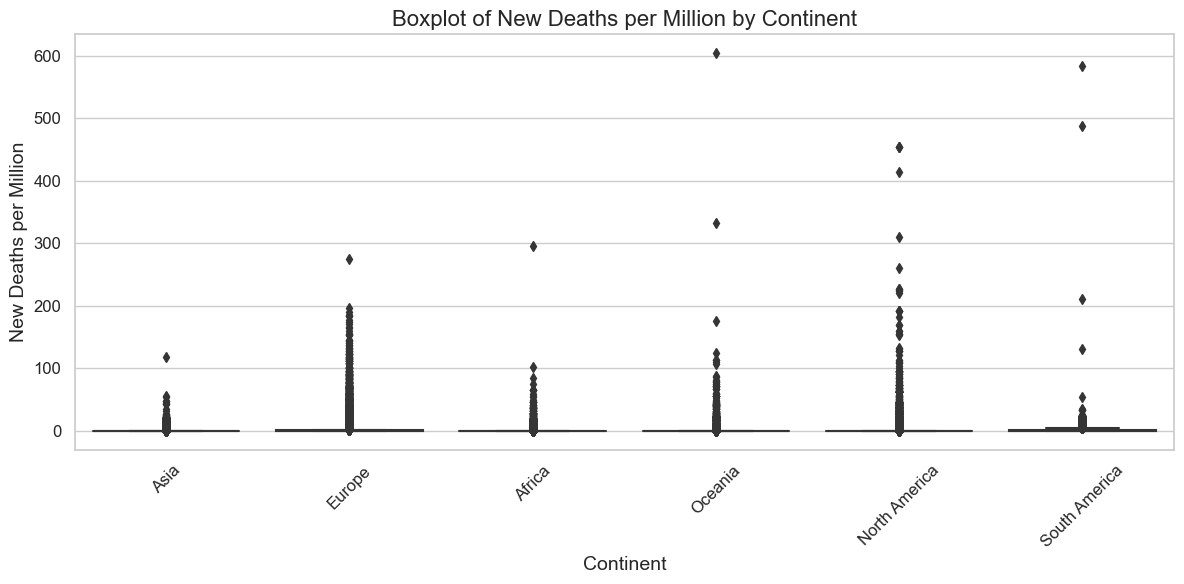

In [28]:
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(x='continent', y='new_deaths_per_million', data=owid, palette="viridis")
plt.title('Boxplot of New Deaths per Million by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('New Deaths per Million', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("new_deaths_per_million_boxplot.png", dpi=300)
plt.show()

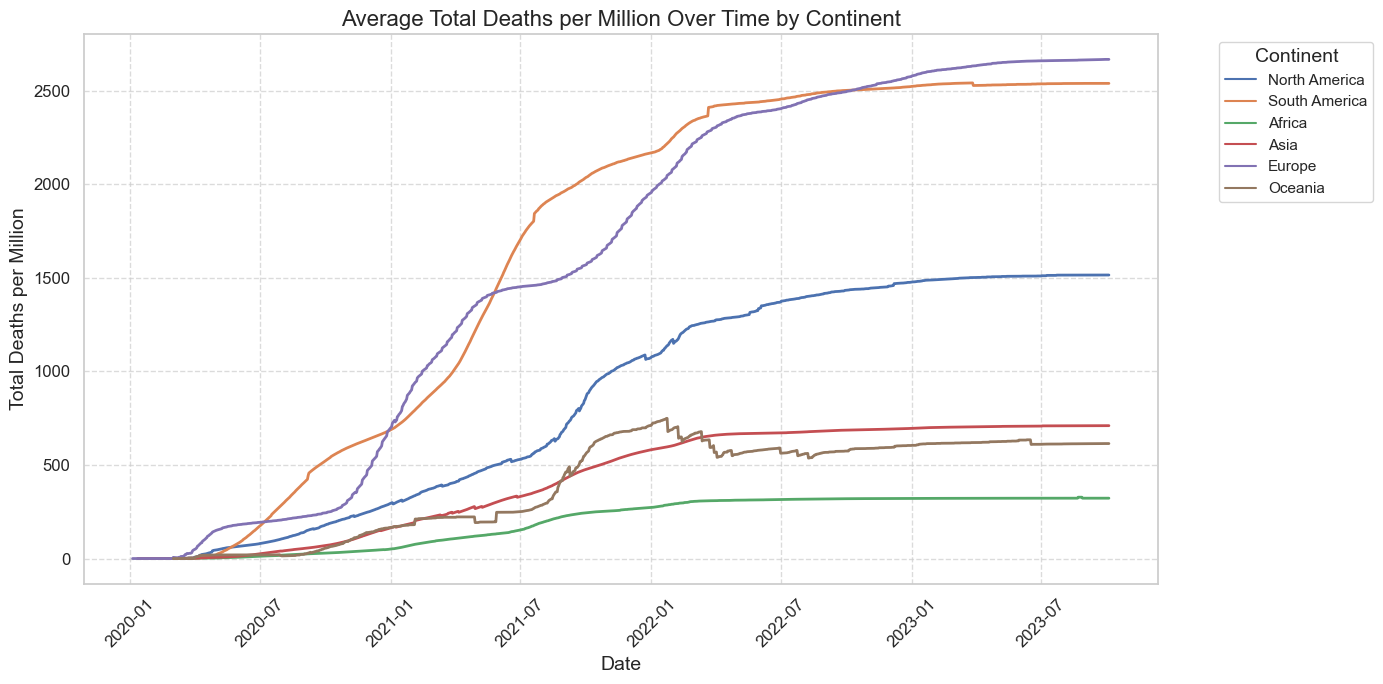

In [29]:
# Group by date and continent, then calculate the mean of total_deaths_per_million
grouped_data = owid.groupby(['date', 'continent'])['total_deaths_per_million'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7), dpi=100)
sns.lineplot(x='date', y='total_deaths_per_million', hue='continent', data=grouped_data, lw=2)

plt.title('Average Total Deaths per Million Over Time by Continent', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Deaths per Million', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Continent', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

There is something wrong with Ocenia data

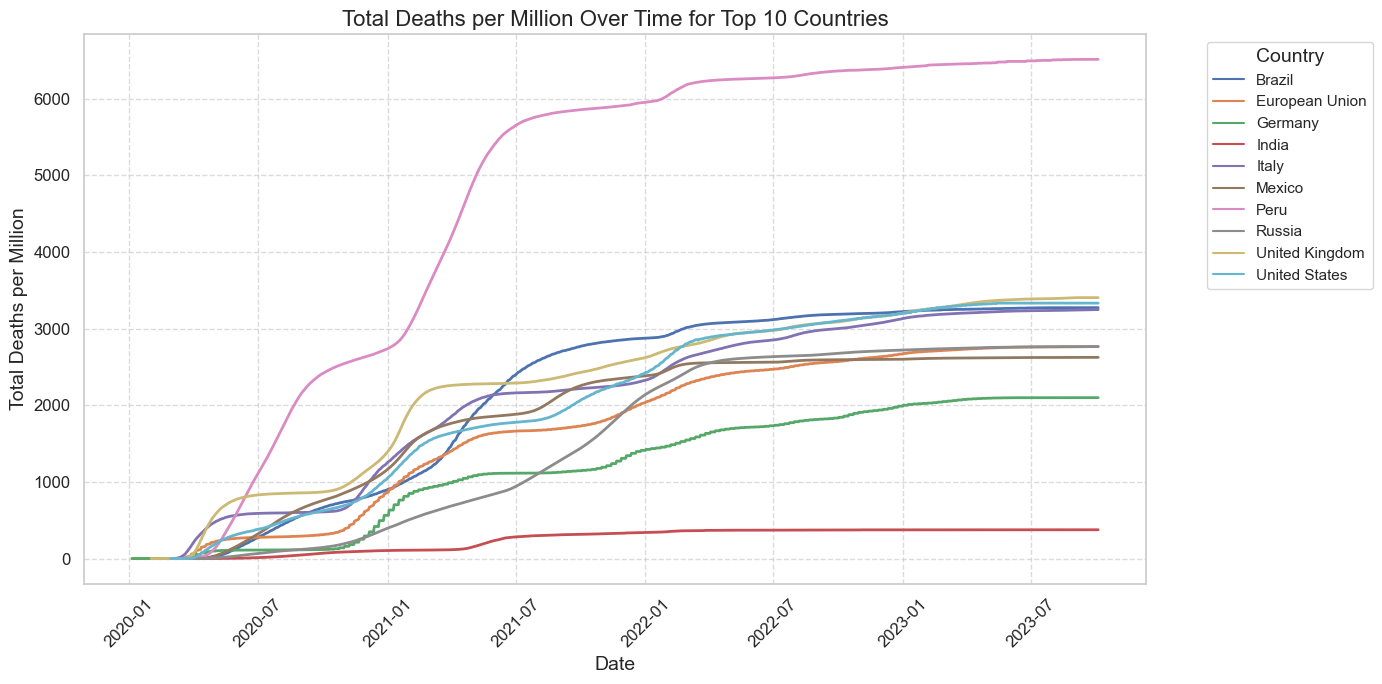

In [30]:
# Step 1: Identify top 10 countries based on total_deaths
top_countries = filtered_owid.groupby('location')['total_deaths'].max().sort_values(ascending=False).head(10).index

# Step 2: Filter the DataFrame to only these countries
filtered_top_countries = filtered_owid[filtered_owid['location'].isin(top_countries)]

# Step 3: Plotting
plt.figure(figsize=(14, 7), dpi=100)
sns.lineplot(x='date', y='total_deaths_per_million', hue='location', data=filtered_top_countries, lw=2)

plt.title('Total Deaths per Million Over Time for Top 10 Countries', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Deaths per Million', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Country', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

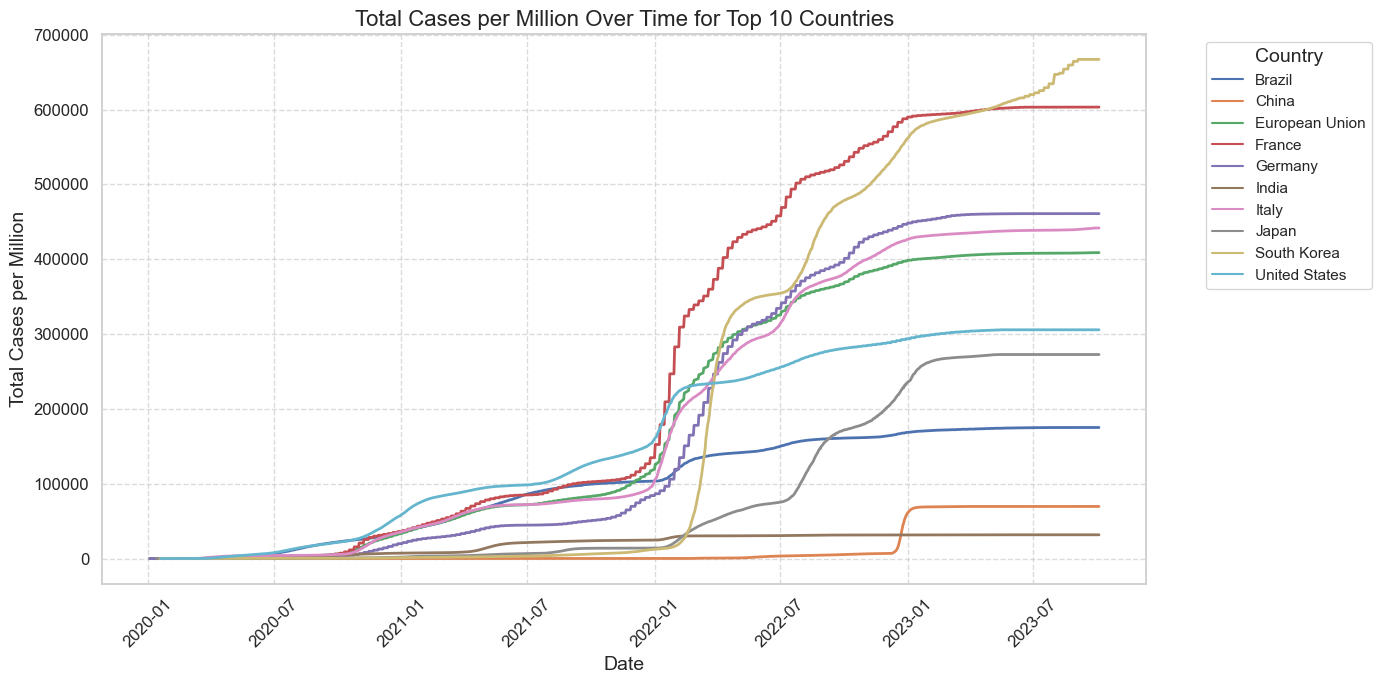

In [31]:
# Step 1: Identify top 10 countries based on total_cases
top_countries_cases = filtered_owid.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10).index

# Step 2: Filter the DataFrame to only these countries
filtered_top_countries_cases = filtered_owid[filtered_owid['location'].isin(top_countries_cases)]

# Step 3: Plotting
plt.figure(figsize=(14, 7), dpi=100)
sns.lineplot(x='date', y='total_cases_per_million', hue='location', data=filtered_top_countries_cases, lw=2)

plt.title('Total Cases per Million Over Time for Top 10 Countries', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases per Million', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Country', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Clustering Analyis of "owid" for Countries

In [32]:
# 1. Handling Columns with High NA Proportion:
threshold_high = 0.5  # setting threshold as 50%

# Identify columns with less than or equal to 50% NA
cols_to_keep = owid.columns[owid.isna().mean() <= threshold_high]

# Keep only those columns
owid_cleaned = owid[cols_to_keep]

# 2. Handling Columns with Low NA Proportion: Remove the row if it has NA
owid_cleaned = owid_cleaned.dropna()
owid_cleaned

# Checking if any column has NA values
print("Columns with NA values:", owid_cleaned.columns[owid_cleaned.isna().any()].tolist())
# Checking the shape of the cleaned data
print("\nShape of cleaned data:", owid_cleaned.shape)
# Checking the first few rows of the cleaned data
print("\nHead of cleaned data:")
print(owid_cleaned.head())

Columns with NA values: []

Shape of cleaned data: (80318, 35)

Head of cleaned data:
     iso_code continent location       date  total_cases  new_cases  \
3116      ALB    Europe  Albania 2021-01-11      63033.0      655.0   
3117      ALB    Europe  Albania 2021-01-12      63595.0      562.0   
3118      ALB    Europe  Albania 2021-01-13      63971.0      376.0   
3119      ALB    Europe  Albania 2021-01-14      64627.0      656.0   
3120      ALB    Europe  Albania 2021-01-15      65334.0      707.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
3116             577.429        1233.0         3.0                6.143   
3117             593.857        1241.0         8.0                6.857   
3118             621.143        1247.0         6.0                6.857   
3119             620.571        1252.0         5.0                6.000   
3120             618.000        1256.0         4.0                5.571   

      total_cases_per_million  new_c

In [33]:
# Data Aggregation
# Getting the most recent values
country_agg = owid_cleaned.sort_values('date').groupby('location').last()
# Median
# country_agg = country_latest.groupby('location').median()
# Calculate rates on the most recent values
country_agg['death_rate'] = country_agg['total_deaths'] / country_agg['total_cases']
country_agg.shape

(124, 35)

In [34]:
country_agg.head()

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,death_rate
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,ALB,Europe,2022-12-31,332768.0,30.0,16.571,3596.0,0.0,0.000,117076.274,10.555,5.830,1265.165,0.000,0.000,0.89,606.0,213.0,65.0,0.002,11.11,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0,0.010806
Algeria,DZA,Africa,2022-09-04,270426.0,21.0,35.857,6878.0,0.0,0.000,6022.418,0.468,0.799,153.174,0.000,0.000,0.52,628.0,14.0,0.0,0.000,33.44,17.348,29.1,6.211,3.857,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,0.748,44903228.0,0.025434
Argentina,ARG,South America,2022-12-31,9891139.0,0.0,8843.286,130124.0,0.0,6.286,217338.356,0.000,194.314,2859.219,0.000,0.138,0.10,71806.0,1578.0,1165.0,0.003,14.38,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,5.00,76.67,0.845,45510324.0,0.013156
Australia,AUS,Oceania,2022-12-31,10785559.0,0.0,13074.000,17816.0,0.0,47.714,412017.805,0.000,499.438,680.587,0.000,1.823,0.84,2023.0,77.0,0.0,0.000,11.11,3.202,37.9,15.504,10.129,44648.710,107.791,5.07,13.0,16.5,3.84,83.44,0.944,26177410.0,0.001652
Austria,AUT,Europe,2022-12-31,5700846.0,4289.0,3960.857,21634.0,13.0,10.857,637705.844,479.774,443.068,2420.014,1.454,1.214,0.88,1720.0,192.0,30.0,0.000,35.19,106.749,44.4,19.202,13.748,45436.686,145.183,6.35,28.4,30.9,7.37,81.54,0.922,8939617.0,0.003795


In [35]:
# Remove non-numeric columns before scaling
country_agg_numeric = country_agg.select_dtypes(include=[np.number])

# Ensure that NaN values are removed from `country_agg_numeric`
country_agg_numeric = country_agg_numeric.dropna()

# Scale the numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_country_agg = pd.DataFrame(
    scaler.fit_transform(country_agg_numeric),
    columns=country_agg_numeric.columns,
    index=country_agg_numeric.index  # keeping the original index
)
# Example of clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(norm_country_agg)

# Adding cluster labels back to original data
country_agg['cluster'] = kmeans.labels_

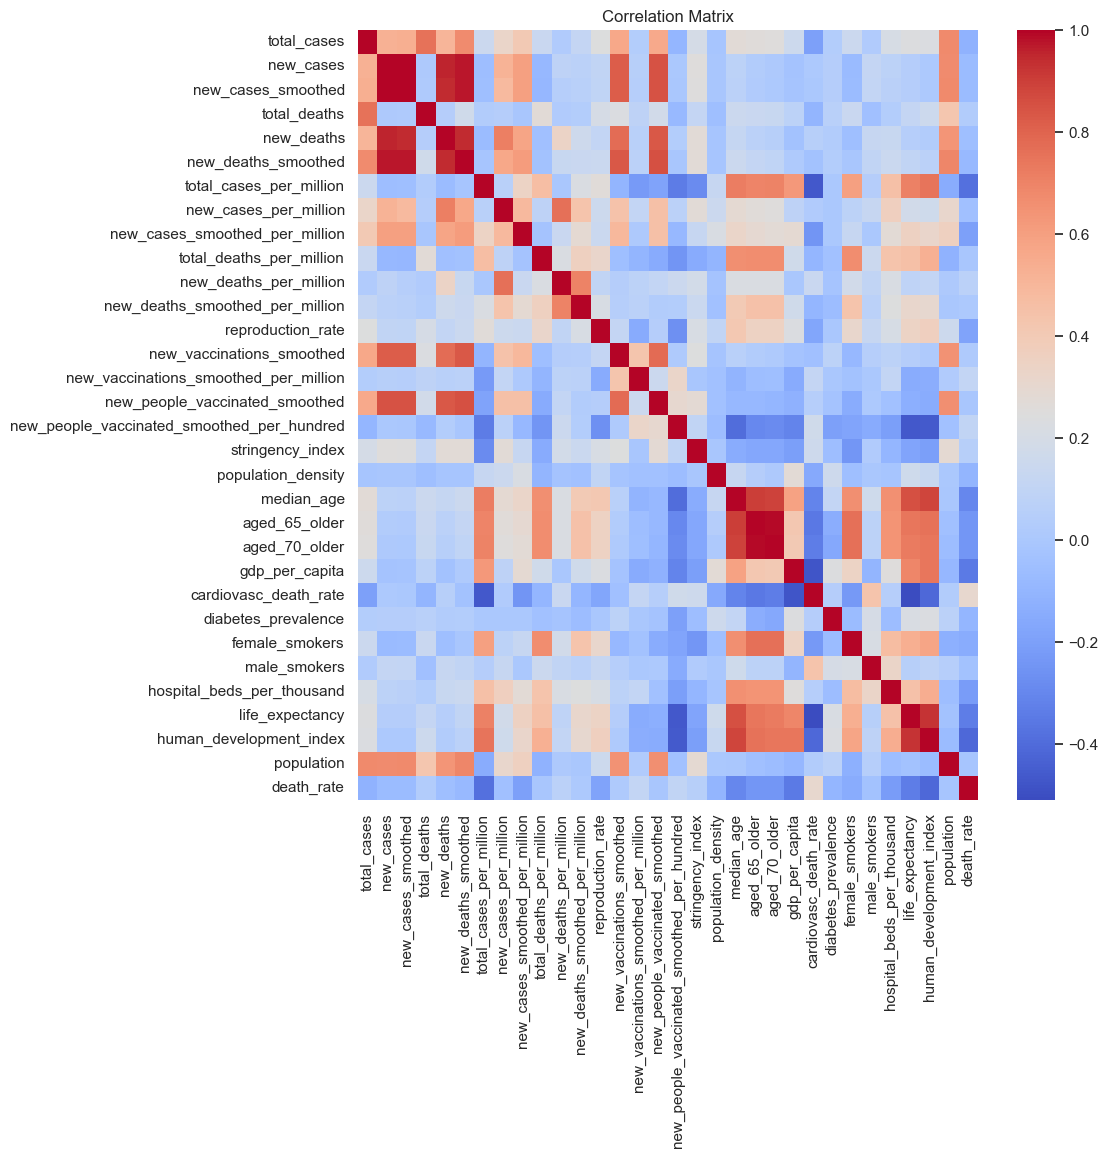

In [36]:
# Checking also correlation between variables while we got the numeric data
correlation_matrix = norm_country_agg.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

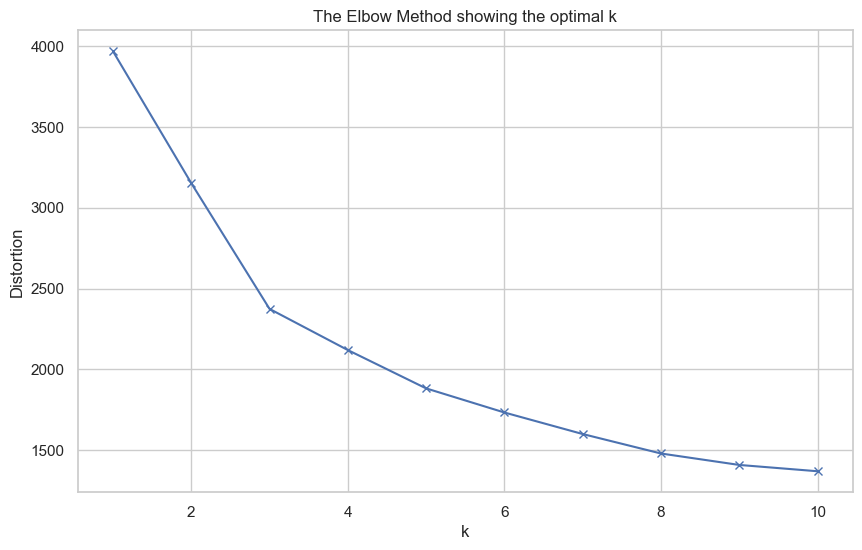

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute k-means for values of k from 1 to 10
distortions = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(norm_country_agg)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [38]:
# clustering with three cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(norm_country_agg)

# Adding cluster labels back to original data
country_agg['cluster'] = kmeans.labels_

In [39]:
# Analyzing cluster centers
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=country_agg_numeric.columns)

# Optionally, round the centers for easier interpretation
centers.round(2)

# Count of countries in each cluster
cluster_counts = country_agg['cluster'].value_counts().reset_index().rename(columns={'index': 'cluster', 'cluster': 'count'})

# Displaying cluster centers
print("Cluster Centers:")
print(centers)

# Displaying cluster sizes
print("\nCluster Sizes:")
print(cluster_counts)


Cluster Centers:
    total_cases     new_cases  new_cases_smoothed  total_deaths   new_deaths  \
0  1.978569e+06  2.327568e+02        1.535136e+02  28310.324324     3.608108   
1  9.596547e+06  7.952429e+03        9.682662e+03  83816.897959    53.938776   
2  8.492504e+07  2.429272e+06        4.021322e+06  52544.000000  3806.000000   

   new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
0             1.530892             83018.517527              11.420365   
1            40.667673            358772.281449             180.370918   
2          2131.143000             59559.433000            1703.691000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                       24.536243                747.650662   
1                      322.609000               2400.875633   
2                     2820.224000                 36.850000   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                0.070068      

In [40]:
#  Analyzing countries in cluster 0
cluster_0 = country_agg[country_agg['cluster'] == 0]

print("\nCountries in Cluster 0:")
print(cluster_0.index.tolist())


Countries in Cluster 0:
['Albania', 'Algeria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Benin', 'Botswana', 'Brunei', 'Burkina Faso', 'Cambodia', 'Cape Verde', 'Colombia', 'Costa Rica', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eswatini', 'Ethiopia', 'Fiji', 'Gambia', 'Ghana', 'Haiti', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Liberia', 'Malawi', 'Malaysia', 'Mali', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Philippines', 'Qatar', 'Saudi Arabia', 'Seychelles', 'South Africa', 'Sri Lanka', 'Suriname', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tonga', 'Tunisia', 'Turkey', 'Uganda', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']


In [41]:
#  Analyzing countries in cluster 1
cluster_0 = country_agg[country_agg['cluster'] == 1]

print("\nCountries in Cluster 1:")
print(cluster_0.index.tolist())


Countries in Cluster 1:
['Argentina', 'Australia', 'Austria', 'Barbados', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay']


In [42]:
#  Analyzing countries in cluster 2
cluster_0 = country_agg[country_agg['cluster'] == 2]

print("\nCountries in Cluster 2:")
print(cluster_0.index.tolist())


Countries in Cluster 2:
['China']


### Interpretation of clustering analysis 
The three clusters seem to highlight differences in the scale and impact of the pandemic, as well as potentially the differences in socio-economic and demographic factors among different countries:

* Cluster 0

Size: Largest cluster with 74 countries.
Characteristics: Countries here generally have lower total cases (approx. 1.98M), with a relatively small number of new cases and new deaths (approx. 232 and 3.6 respectively). The death rate is around 1.76%, and the socio-economic and demographic characteristics vary (e.g., medium GDP per capita, a varying range of population density and median age, etc.). This group might represent countries that have managed to keep the total case and death counts relatively lower and possibly have a younger population.

* Cluster 1

Size: Second-largest with 49 countries.
Characteristics: These countries typically exhibit higher total cases (approx. 9.60M) and new cases (approx. 7,952) but have managed to keep the death rate relatively lower (approx. 0.90%) compared to Cluster 0. They tend to have higher GDP per capita, higher median age, and higher percentages of older populations, indicating that they might be more developed countries that have implemented effective control and healthcare interventions, despite having larger outbreaks.

* Cluster 2

Size: Smallest cluster, with only 1 country.
Characteristics: This country shows significantly higher total cases (approx. 84.93M) and new cases (approx. 2.43M). This could likely be a highly-populated country (as seen with the population of approx. 1.43B), which has experienced a massive scale of the outbreak. Considering the death rate is quite low (approx. 0.06%), it might have managed to control the fatality of the virus effectively, potentially through various healthcare, societal, or policy measures.
Feedback & Considerations:

* Validity of Clusters: The clear distinction in the scale between clusters (especially Cluster 2) might imply that certain outliers (likely very large countries) can significantly impact the clustering results. Ensuring clusters are representative and informative for your specific analysis or actionable insights is crucial.

* Number of Clusters: Although we chose three clusters, further analysis with the Elbow Method or Silhouette Analysis might suggest a different optimal number of clusters. It's worthwhile to explore this to ensure you haven't missed a potentially insightful clustering solution.

* Interpretability: Always remember to link back the characteristics of clusters to potential real-world implications or strategies, considering the broader context and other potential factors that might not be included in your dataset.

* Use of Additional Data: Depending on the end goal of the clustering (e.g., understanding why certain countries have higher cases, implementing policies, etc.), incorporating additional data or insights might be necessary for a comprehensive analysis.

* Model Choice: While KMeans is widely used due to its simplicity and efficacy, exploring other clustering algorithms that consider the density or hierarchical nature of data might provide different perspectives and insights.

### 5. Wave Analysis
In this section, we will focus on identifying and analyzing the waves of the COVID-19 pandemic, observing patterns and unique characteristics of each significant increase and decrease of case numbers through time.
##### 5.1 Identifying and Analyzing Waves
To identify waves, we’ll examine peaks and troughs in the smoothed data, considering both the magnitude and duration of rising and falling case numbers. Here's a simplified approach:
* Identify peaks: Points where the case numbers are higher than the surrounding data points.
* Identify troughs: Points where the case numbers start to decline after a peak, indicating the end of a wave.
* Validate wave: Ensure each wave has a significant duration and magnitude to exclude minor fluctuations.

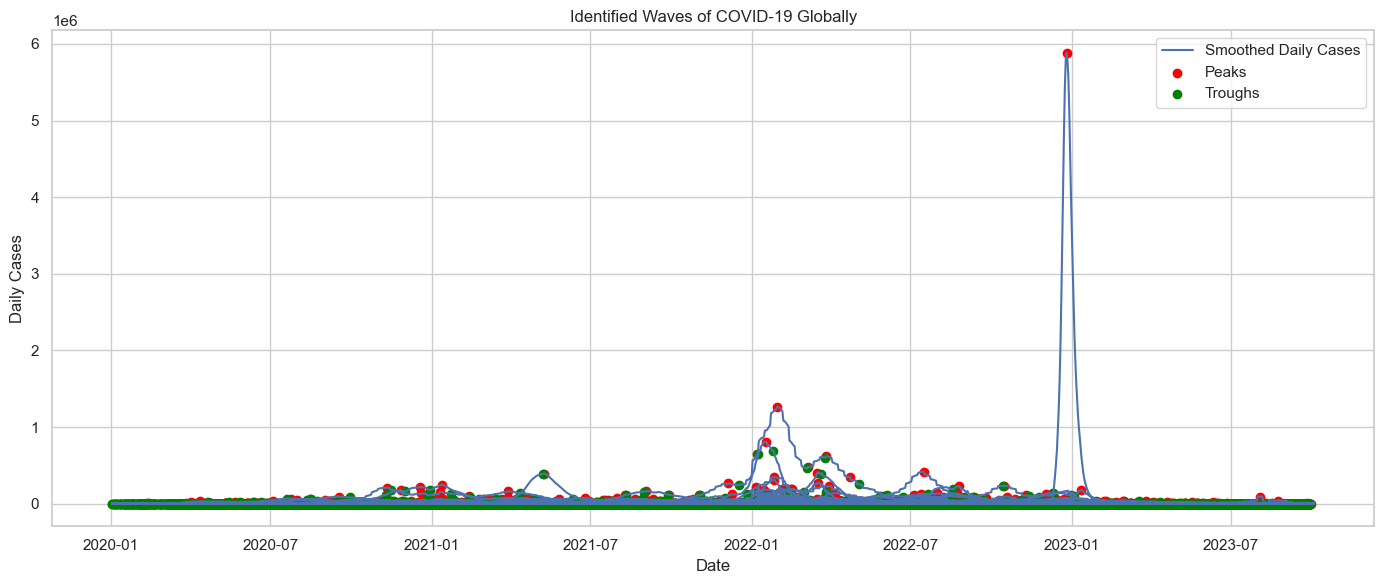

         Start        End   Max Cases   Total Cases  Duration (days)
0   2020-02-29 2020-03-30   11.714286     72.000000               30
1   2020-04-01 2020-04-21   55.571429    754.428571               20
2   2020-04-21 2020-05-13  313.571429   3053.714286               22
3   2020-05-17 2020-06-04  698.285714  10459.857143               18
4   2020-06-06 2020-06-24  758.571429  12463.857143               18
..         ...        ...         ...           ...              ...
107 2023-05-08 2023-06-21   10.000000    109.000000               44
108 2023-05-31 2023-07-19    2.142857     21.428571               49
109 2023-06-29 2023-08-17    2.428571     19.857143               49
110 2023-08-11 2023-09-21    2.428571     31.142857               41
111 2023-09-29 2020-11-07    2.142857      8.571429            -1056

[112 rows x 5 columns]


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks


# Assuming the date is in the 'date' column, ensure it's in datetime format
filtered_owid['date'] = pd.to_datetime(filtered_owid['date'])

# Now, we'll set this date as the index of your dataframe
data = filtered_owid.set_index('date')

# Assuming new_cases is the column with daily new cases.
smoothed = data['new_cases'].rolling(window=7).mean()

# Identify peaks which might indicate the start of a wave
peaks, _ = find_peaks(smoothed, distance=20)

# Identify troughs which might indicate the end of a wave
troughs, _ = find_peaks(-smoothed, distance=20)

# Visualize the waves
plt.figure(figsize=(14, 6))
plt.plot(data.index, smoothed, label='Smoothed Daily Cases')
plt.scatter(data.index[peaks], smoothed.iloc[peaks], color='red', label='Peaks')
plt.scatter(data.index[troughs], smoothed.iloc[troughs], color='green', label='Troughs')
plt.legend()
plt.title("Identified Waves of COVID-19 Globally")
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyzing Waves
waves = []
for start, end in zip(peaks[:-1], troughs[1:]):
    wave_data = smoothed.iloc[start:end]
    if len(wave_data) > 0:
        max_cases = wave_data.max()
        total_cases = wave_data.sum()
        duration = (wave_data.index[-1] - wave_data.index[0]).days
        waves.append({'Start': wave_data.index[0], 'End': wave_data.index[-1], 'Max Cases': max_cases, 'Total Cases': total_cases, 'Duration (days)': duration})

waves_df = pd.DataFrame(waves)
print(waves_df)


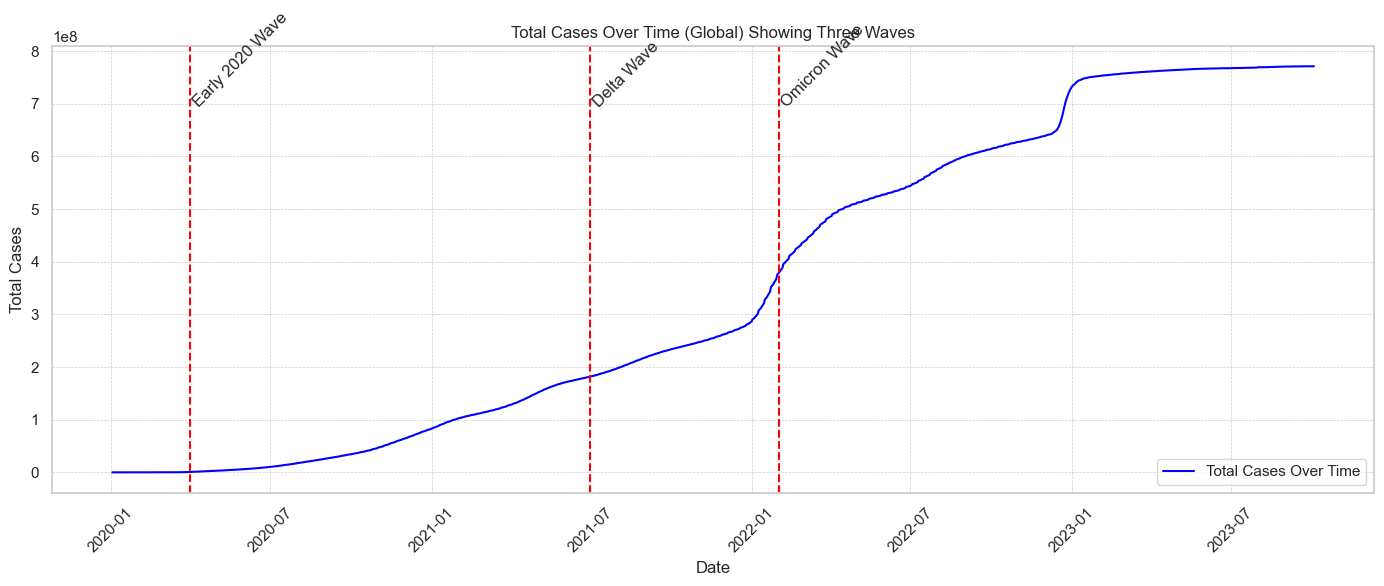

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your dataset)
# Assuming `owid` is your data
# owid = pd.read_csv('your_data_file.csv', parse_dates=['date'], index_col='date')

# Filtering for global data (assuming 'location' column distinguishes global data)
filtered_owid = owid[owid['location'] == 'World']

# Calculate the cumulative cases (if you haven't already)
filtered_owid['total_cases'] = filtered_owid['new_cases'].cumsum()


# Plotting the waves
plt.figure(figsize=(14, 6))

sns.lineplot(data=filtered_owid, x='date', y='total_cases', color='blue', label='Total Cases Over Time')

# Mark the waves
waves = {
    'Early 2020 Wave': '2020-04-01',  # Roughly around April 2020 for the first wave
    'Delta Wave': '2021-07-01',       # Roughly around July 2021 for the Delta wave
    'Omicron Wave': '2022-02-01'      # Roughly around February 2022 for the Omicron wave
}

for wave, date in waves.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--')
    plt.text(pd.to_datetime(date), filtered_owid['total_cases'].max() * 0.9, wave, rotation=45)

plt.title('Total Cases Over Time (Global) Showing Three Waves')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


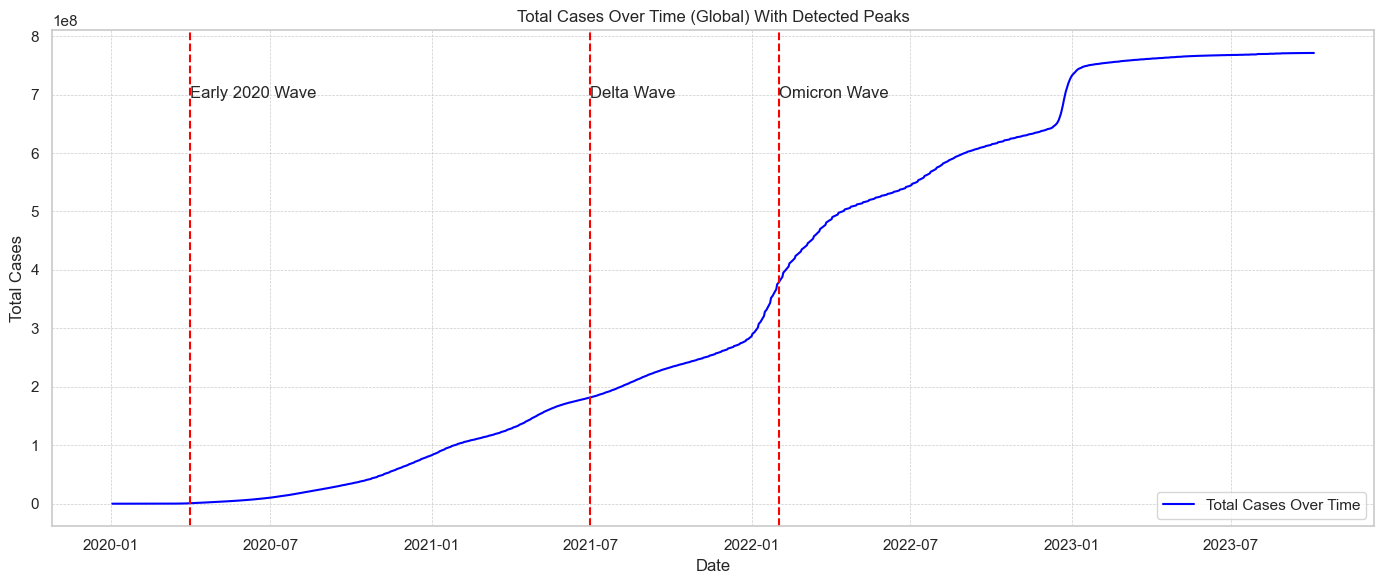

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

# Sample data (replace with your dataset)
# Assuming owid is your data
# owid = pd.read_csv('your_data_file.csv', parse_dates=['date'], index_col='date')

# Filtering for global data (assuming 'location' column distinguishes global data)
filtered_owid = owid[owid['location'] == 'World']

# Calculate the cumulative cases (if you haven't already)
filtered_owid['total_cases'] = filtered_owid['new_cases'].cumsum()

# Find peaks in the total_cases column
peaks, _ = find_peaks(filtered_owid['total_cases'], distance=150)  # using a distance to ensure peaks aren't too close

# Plotting the waves
plt.figure(figsize=(14, 6))

sns.lineplot(data=filtered_owid, x='date', y='total_cases', color='blue', label='Total Cases Over Time')
# Mark the waves
waves = {
    'Early 2020 Wave': '2020-04-01',  # Roughly around April 2020 for the first wave
    'Delta Wave': '2021-07-01',       # Roughly around July 2021 for the Delta wave
    'Omicron Wave': '2022-02-01'      # Roughly around February 2022 for the Omicron wave
}
for wave, date in waves.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--')
    plt.text(pd.to_datetime(date), filtered_owid['total_cases'].max() * 0.9, wave)
# Annotating peaks
for peak in peaks:
    plt.plot(filtered_owid.iloc[peak]['date'], filtered_owid.iloc[peak]['total_cases'], "ro")
    plt.text(filtered_owid.iloc[peak]['date'], filtered_owid.iloc[peak]['total_cases'], filtered_owid.iloc[peak]['date'].strftime('%Y-%m-%d'))

plt.title('Total Cases Over Time (Global) With Detected Peaks')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

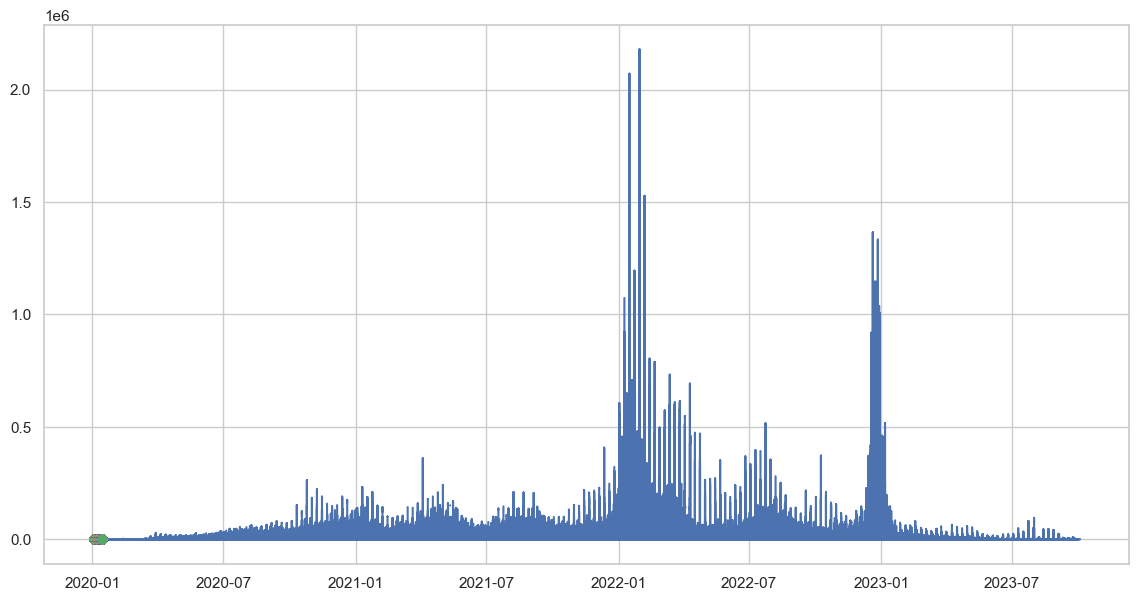

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming 'owid' is the dataset and it contains a 'date' column and a 'new_cases' column for global data.
# If you're analyzing a specific country, make sure to filter the dataset for that country first.

# 1. Smoothing the Data
owid['date'] = pd.to_datetime(owid['date'])
owid_sorted = owid.sort_values(by='date')
owid_sorted.set_index('date', inplace=True)

# Using a 7-day rolling average to smooth the data
owid_sorted['new_cases_smooth'] = owid_sorted['new_cases'].rolling(window=7).mean()

# 2. Identifying Peaks and Troughs
peaks, _ = find_peaks(owid_sorted['new_cases_smooth'])
troughs, _ = find_peaks(-owid_sorted['new_cases_smooth'])

# 3. Defining and Analyzing Waves
waves = []
for i in range(len(troughs)-1):
    wave_start = owid_sorted.index[troughs[i]]
    wave_end = owid_sorted.index[troughs[i+1]]
    wave_peak = owid_sorted.index[peaks[i]]
    waves.append((wave_start, wave_peak, wave_end))

# Plotting the waves
plt.figure(figsize=(14,7))
plt.plot(owid_sorted['new_cases_smooth'], label='7-day Rolling Average of New Cases')
for i, (start, peak, end) in enumerate(waves):
    plt.plot([start, end], [owid_sorted['new_cases_smooth'][start], owid_sorted['new_cases_smooth'][end]], marker='o', label=f'Wave {i+1}')

plt.title("COVID-19 Waves Analysis")
plt.xlabel("Date")
plt.ylabel("Number of New Cases")
plt.legend()
plt.grid(True)
plt.show()

# Analyzing each wave's magnitude and duration
for i, (start, peak, end) in enumerate(waves):
    print(f"Wave {i+1}:")
    print(f" Start Date: {start}")
    print(f" Peak Date: {peak}")
    print(f" End Date: {end}")
    print(f" Duration: {end - start} days")
    print(f" Magnitude: {owid_sorted['new_cases_smooth'][peak] - owid_sorted['new_cases_smooth'][start]} new cases from start to peak")
    print("\n")
